## Viewing data and cleaning descriptions

In [1]:
import pandas as pd 
import os 

data = pd.read_csv("winemag-data_first150k.csv", index_col = False)
data.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [3]:
### Note: add plotly charts for Towards Data Science Article.

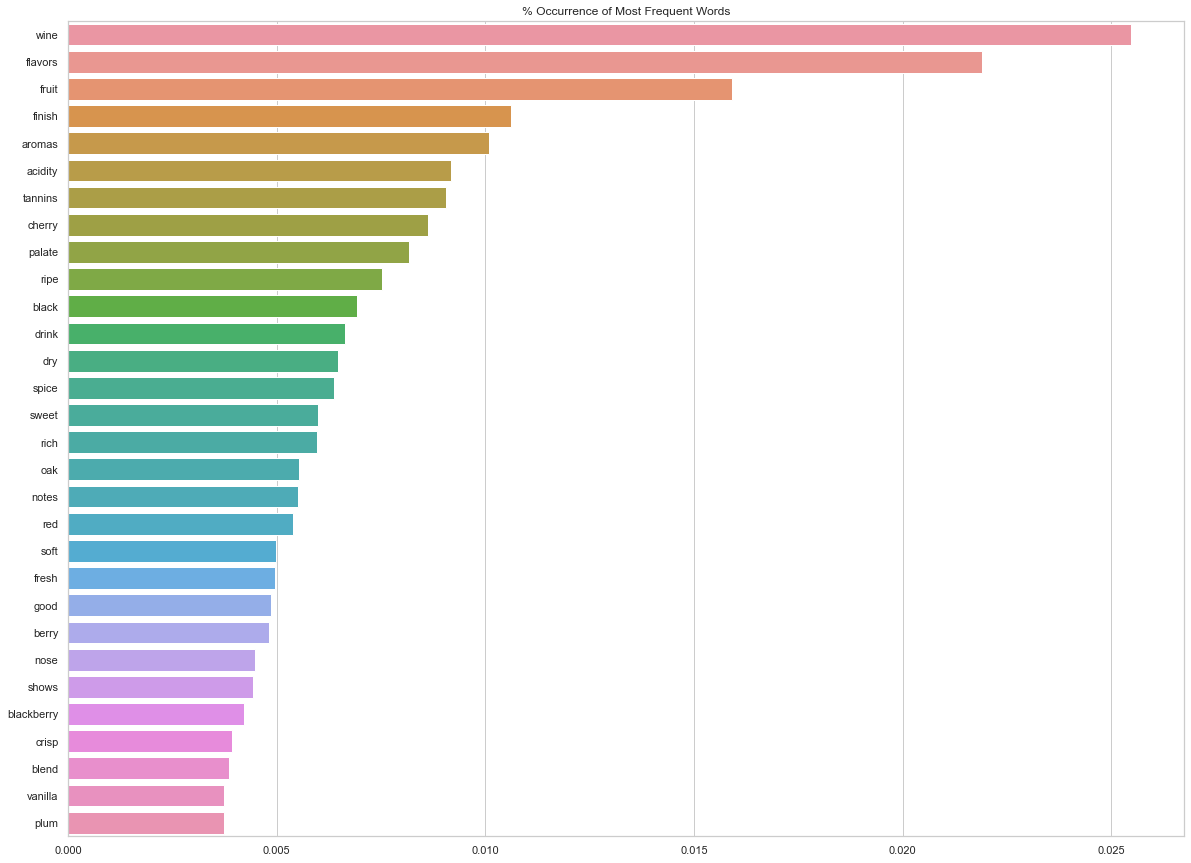

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize

# set seaborn style 
plt.figure(figsize=(20,15))
sns.set(style="whitegrid")

stopwords = set(stopwords.words('english'))
detokenizer = TreebankWordDetokenizer()

def clean_description(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(desc)

data["cleaned_description"] = data["description"].apply(clean_description)

word_occurrence = data["cleaned_description"].str.split(expand=True).stack().value_counts()

total_words = sum(word_occurrence)

# plot most common words 

top_words = word_occurrence[:30]/total_words

ax = sns.barplot(x = top_words.values, y = top_words.index)

# Setting title 
ax.set_title("% Occurrence of Most Frequent Words")

plt.show()

In [5]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,cleaned_description
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,tremendous varietal wine hails oakville aged t...
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe aromas fig blackberry cassis softened swe...
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac watson honors memory wine made mother trem...
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,spent months new french oak incorporates fruit...
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,top wine la bégude named highest point vineyar...


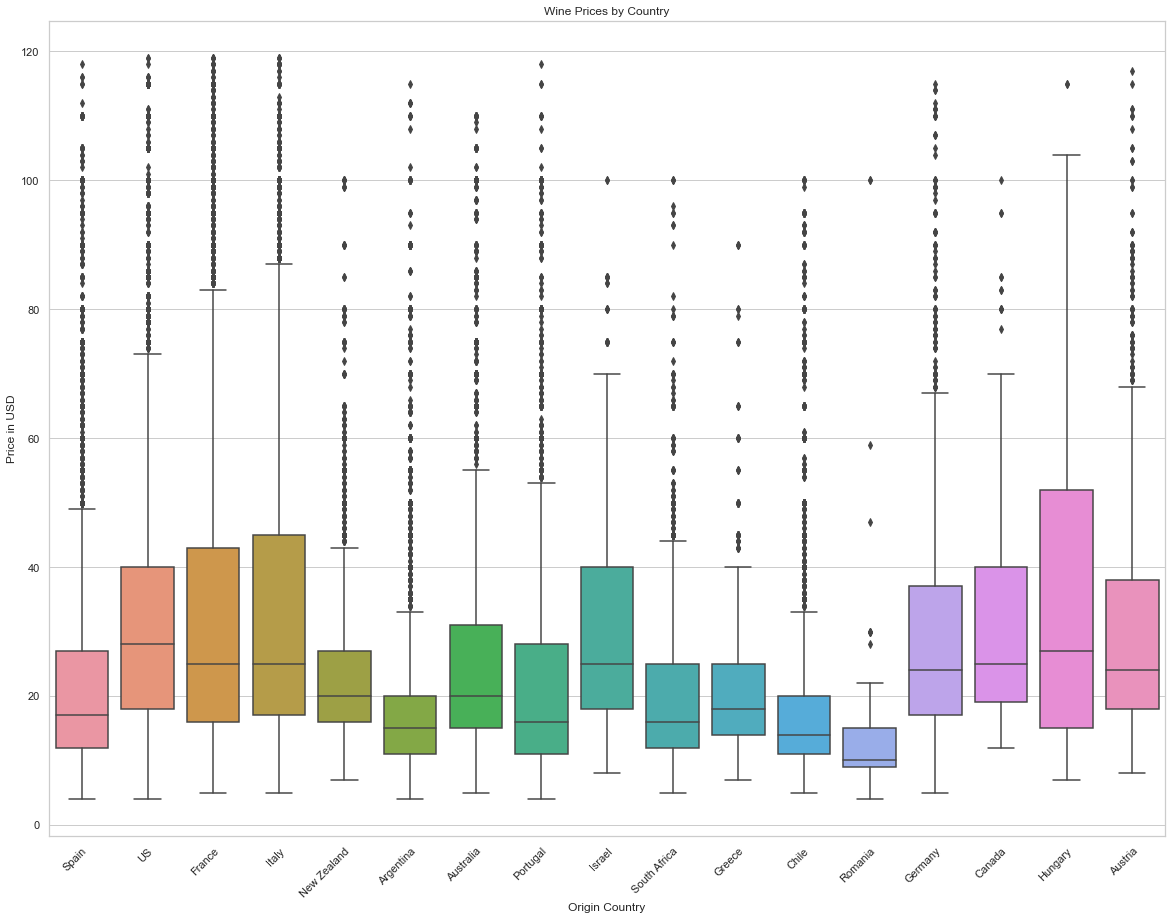

In [6]:
prices_by_country = data[["price", "country"]].dropna(how = "any")

# Remove all data greater than the 98th percentile
val = prices_by_country["price"].quantile(0.98)
prices_by_country = prices_by_country[prices_by_country["price"] < val]

# Only consider countries where at least 100 wines have been reviewed
prices_by_country = prices_by_country.groupby("country").filter(lambda x: (x["price"].count() >= 100))

# Creating a boxplot
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="country", y = "price", data=prices_by_country)

# Setting title 
ax.set_title("Wine Prices by Country")

# Assuming prices are in USD since its an American website
ax.set(xlabel = "Origin Country", ylabel = "Price in USD")

# Making sure ticks aren't overlapping
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

plt.show()

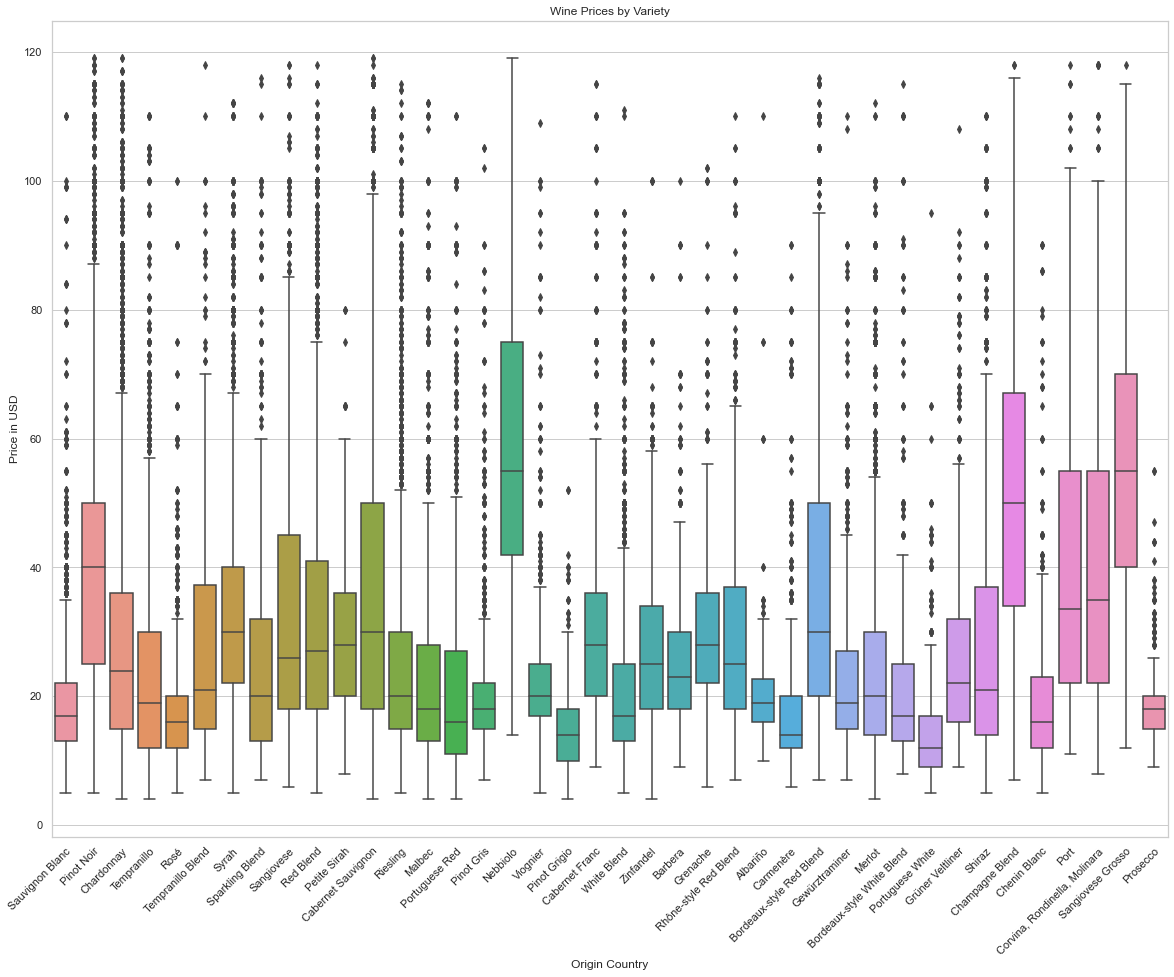

In [7]:
prices_by_variety = data[["price", "variety"]].dropna(how = "any")

# Remove all data greater than the 98th percentile
val = prices_by_variety["price"].quantile(0.98)
prices_by_variety = prices_by_variety[prices_by_variety["price"] < val]

# Only consider varieties where at least 500 wines have been reviewed
prices_by_variety = prices_by_variety.groupby("variety").filter(lambda x: (x["price"].count() >= 500))

# Creating a boxplot
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="variety", y = "price", data=prices_by_variety)

# Setting title 
ax.set_title("Wine Prices by Variety")

# Assuming prices are in USD since its an American website
ax.set(xlabel = "Origin Country", ylabel = "Price in USD")

# Making sure ticks aren't overlapping
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')


plt.show()

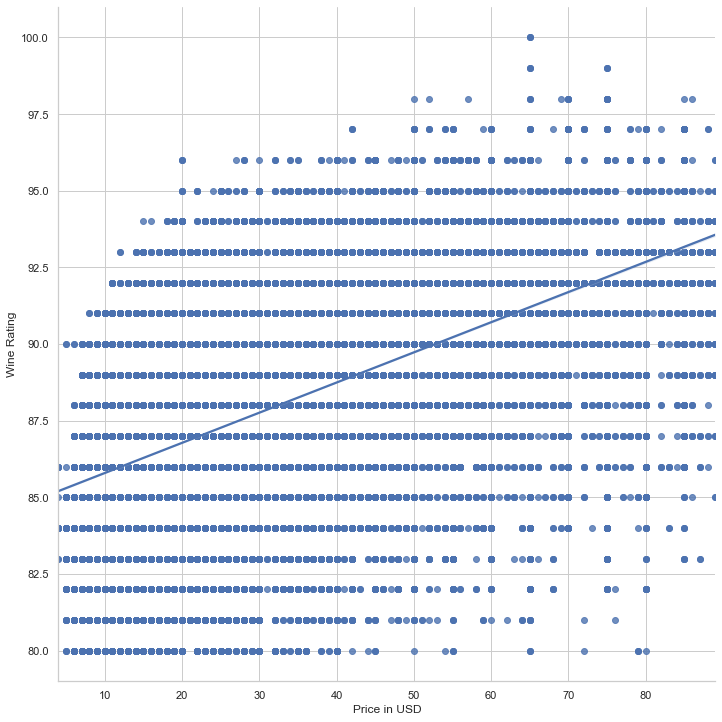

In [8]:
ratings_by_price = data[["price", "points"]]

# Remove all data greater than the 98th percentile
val = prices_by_variety["price"].quantile(0.98)
ratings_by_price = ratings_by_price[ratings_by_price["price"] < val]


ax = sns.lmplot(x = "price", y = "points", data = ratings_by_price, height = 10, aspect = 1)

# Assuming prices are in USD since its an American website
ax.set(xlabel = "Price in USD", ylabel = "Wine Rating")

plt.show()

### Creating a rating system
Reading through the book Wine Folly as well as looking on the Wine Enthusiast website, I came across an excellent point system that I will use to categorize the groups. You can read more about it here: https://winefolly.com/tips/wine-ratings-explained/

TLDR:

The wine rating system was developed back in the 80s which scored wines based on production quality and typicity, (how much the traits of the particular wine typify the style and region its from). Another way to think of it is like a dog show, the winner is the dog which explifies its breed. Any unique features that are not typical will score it lower on the point system. 

Ratings
95 - 100    The benchmark examples or 'Classic'
90 - 94     Superior to Exceptional
85 - 90     Good to veru good
80 - 84     Above average to good
70 - 79     Flawed wines and taste average
60 - 69     Wines are flawed and not recommended but drinkable
50 - 59     Wines are flawed and undrinkable

Interestingly, the dataset has no wines with a score under 80 which alludes again that only the better wines are scored. Additionally there are a couple notable flaws in this system: wine rating intervals vary depending on the different rating sites. For example:

Wine & Spirits magazine says 86 - 89 is highly recommended, whereas Wine Enthusiast Magazine says 85 - 89 is very good. Because of this, I am using Wine Folly's system because the site is used as a training resource for sommeliers, thus offering a solid 3rd party system.

I will be adopting this same point interval system for my classes 0 - 4.

##### Note for the rating system:
Due to issues surrounding biases that arise in self rating systems 

In [34]:
# Converting Points to Classes 

# Note: I found that I had to adjust the class ranges below in order to capture the 100point wines and ensure none were left out.
def points_to_class(points):
    if points in range(79,85):
        return 0
    elif points in range(84,90):
        return 1
    elif points in range(89,95):
        return 2
    elif points in range(94,101):
        return 3
    else:
        return 4
    
data['rating'] = data['points'].apply(points_to_class)

In [35]:
data['rating'].value_counts()

1    79523
2    45229
0    23197
3     2981
Name: rating, dtype: int64

<AxesSubplot:xlabel='points', ylabel='Density'>

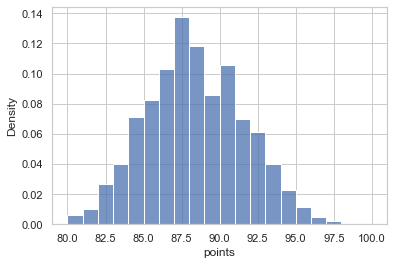

In [36]:
# As expected the data is imbalanced.
# Interestingly, this falls inline with the expected results
# Wine Folly's rating bell curve shows that a majority of the ratings fall between 87 - 89 points
# as seen below and in the link provided earlier

sns.histplot(data = data, x = 'points', stat = 'density', binwidth=1, bins=20)

In [37]:
#Now creating a new column with our newly designated rating classes as "rating".
data["rating"] = data["points"].apply(points_to_class)
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,cleaned_description,rating,sentiment,word_count,review_len
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,tremendous varietal wine hails oakville aged t...,3,0.252083,33,231
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe aromas fig blackberry cassis softened swe...,3,0.331667,30,229
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac watson honors memory wine made mother trem...,3,0.137500,28,206
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,spent months new french oak incorporates fruit...,3,0.105195,40,283
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,top wine la bégude named highest point vineyar...,3,0.150000,33,239


### Diving deeper with Sentiment, Word Count, and Sentence Length

In [38]:
from textblob import TextBlob
#Creating a sentiment column
data['sentiment'] = data['cleaned_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Creating words and Sentence length columns
data['word_count'] = data['cleaned_description'].apply(lambda x: len(str(x).split()))
data['review_len'] = data['cleaned_description'].astype(str).apply(len)

data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,cleaned_description,rating,sentiment,word_count,review_len
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,tremendous varietal wine hails oakville aged t...,3,0.252083,33,231
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe aromas fig blackberry cassis softened swe...,3,0.331667,30,229
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac watson honors memory wine made mother trem...,3,0.137500,28,206
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,spent months new french oak incorporates fruit...,3,0.105195,40,283
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,top wine la bégude named highest point vineyar...,3,0.150000,33,239


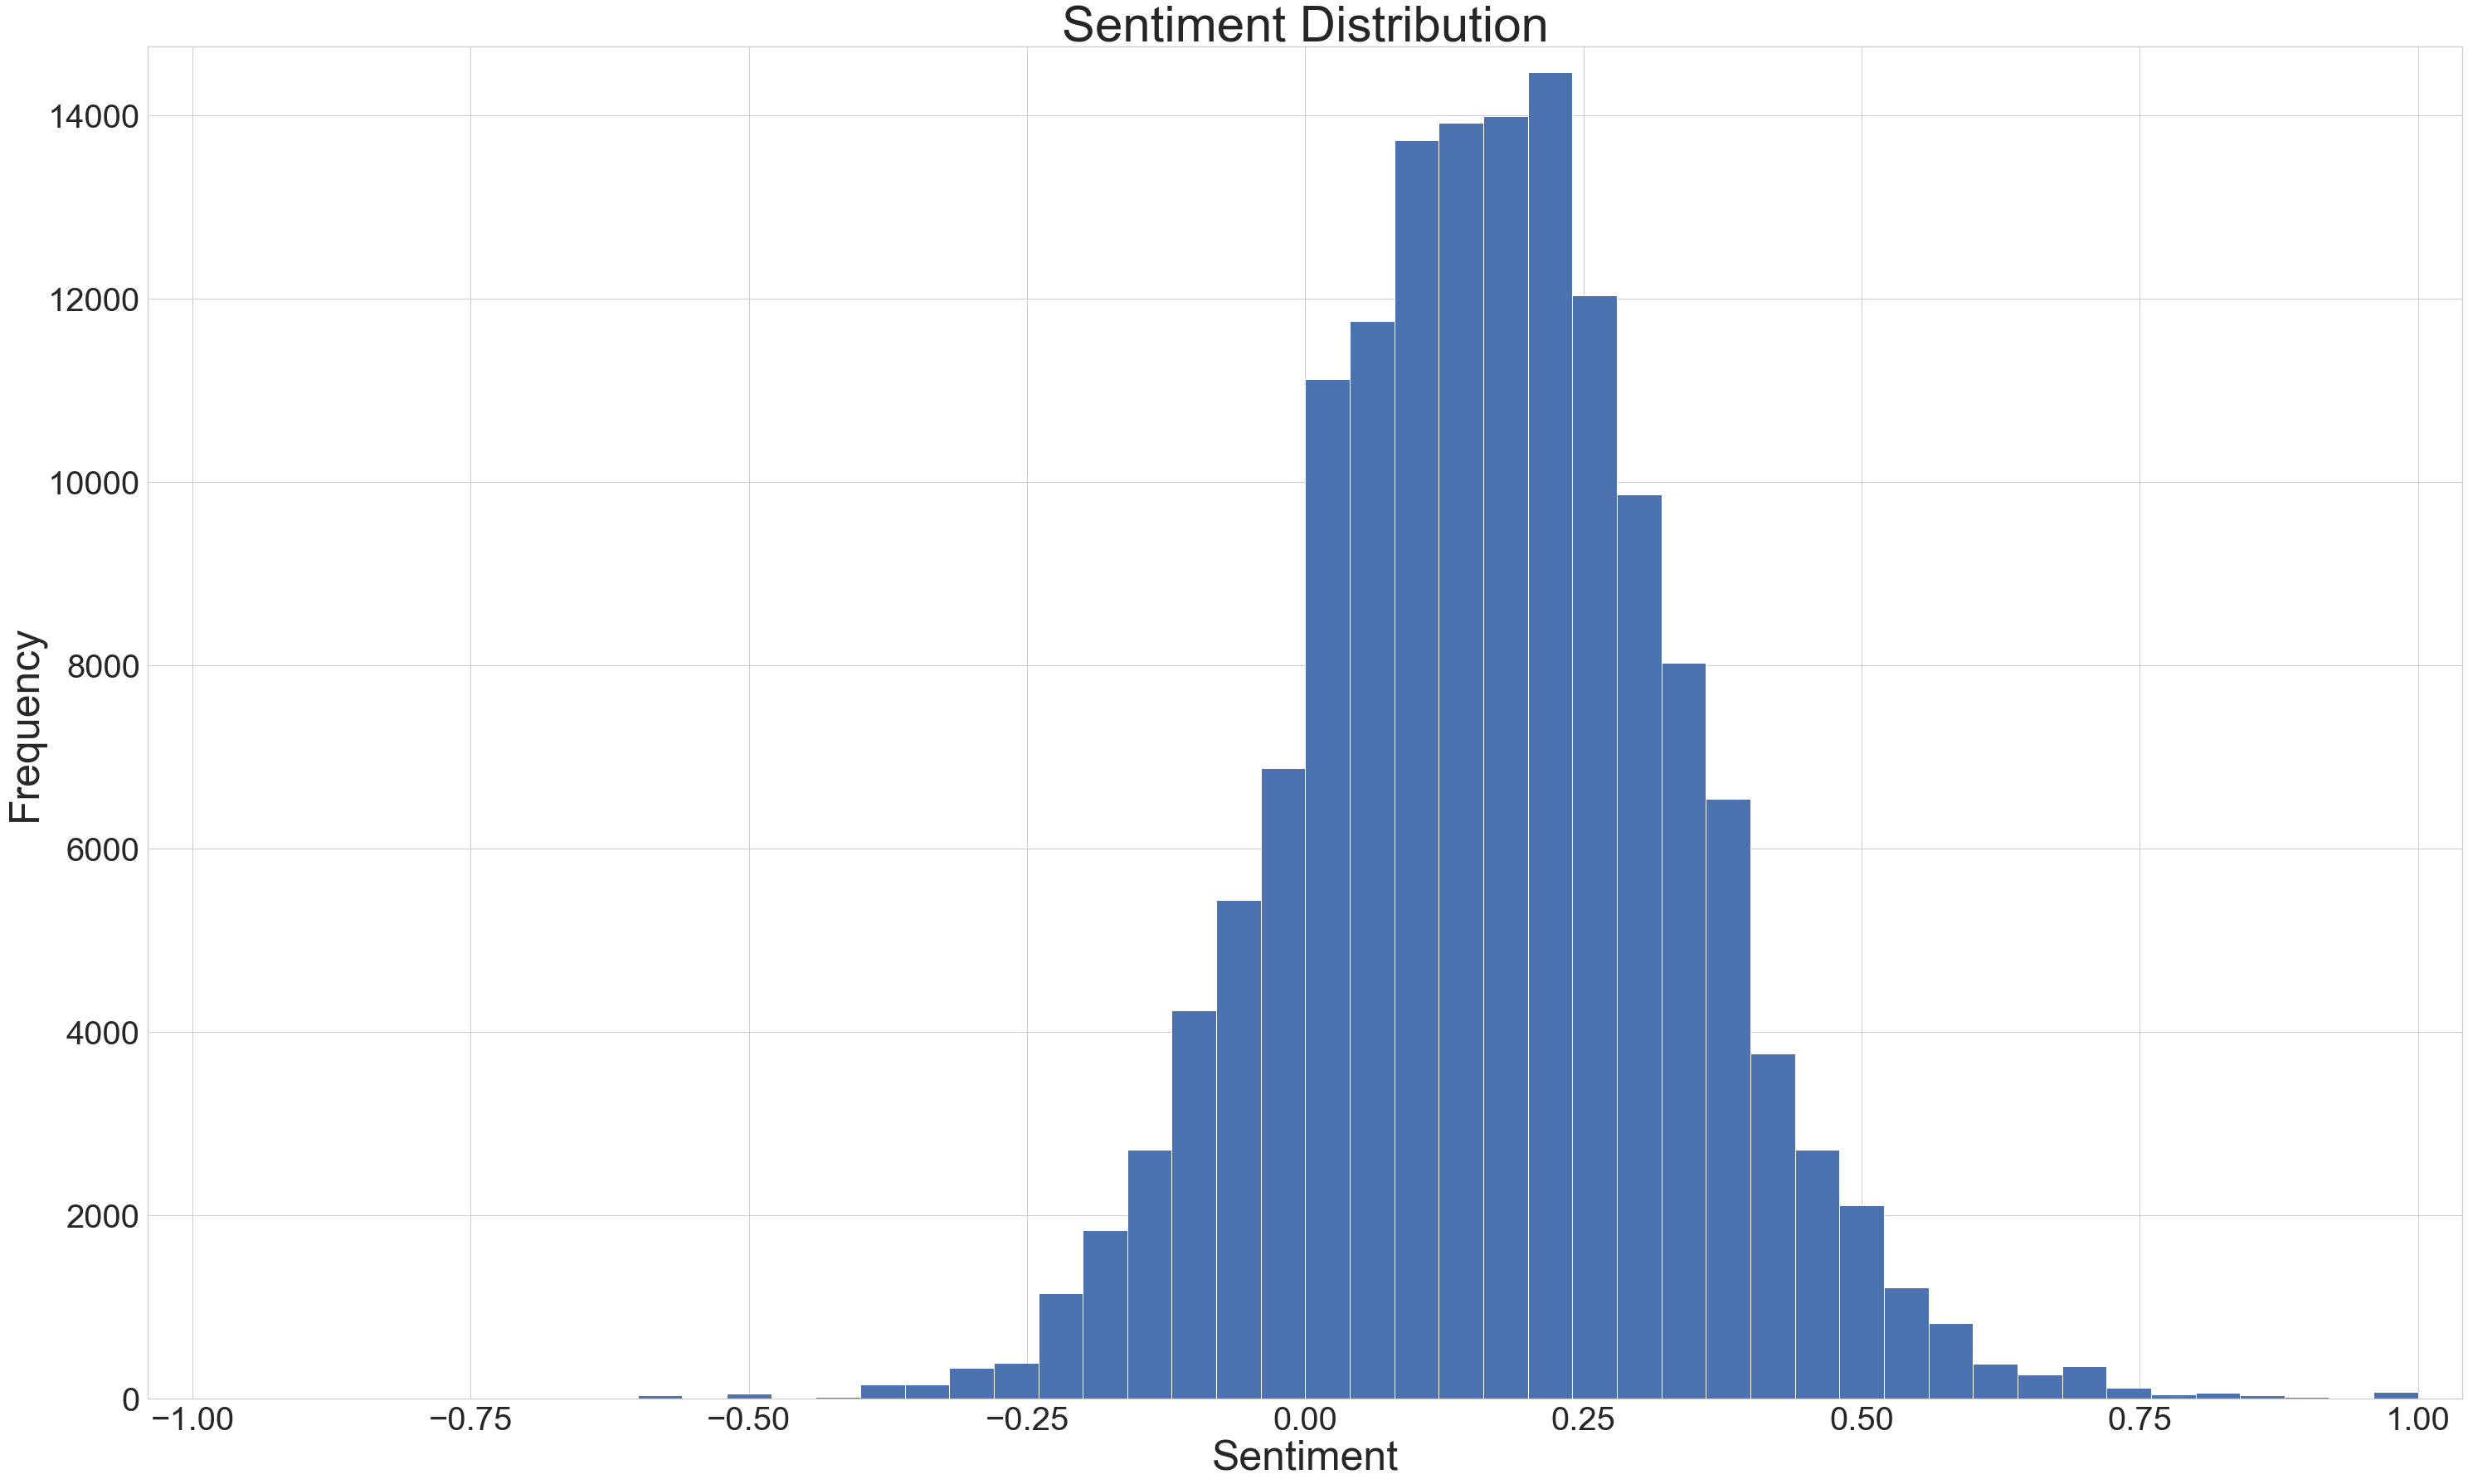

In [39]:
# Given our data is mainly the higher end wines and those that are score, I'd assume there would be a skwew in the sentiment
# Clearly below, we can see there is a much higher concentration of positive vs negative sentiment.
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(data['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

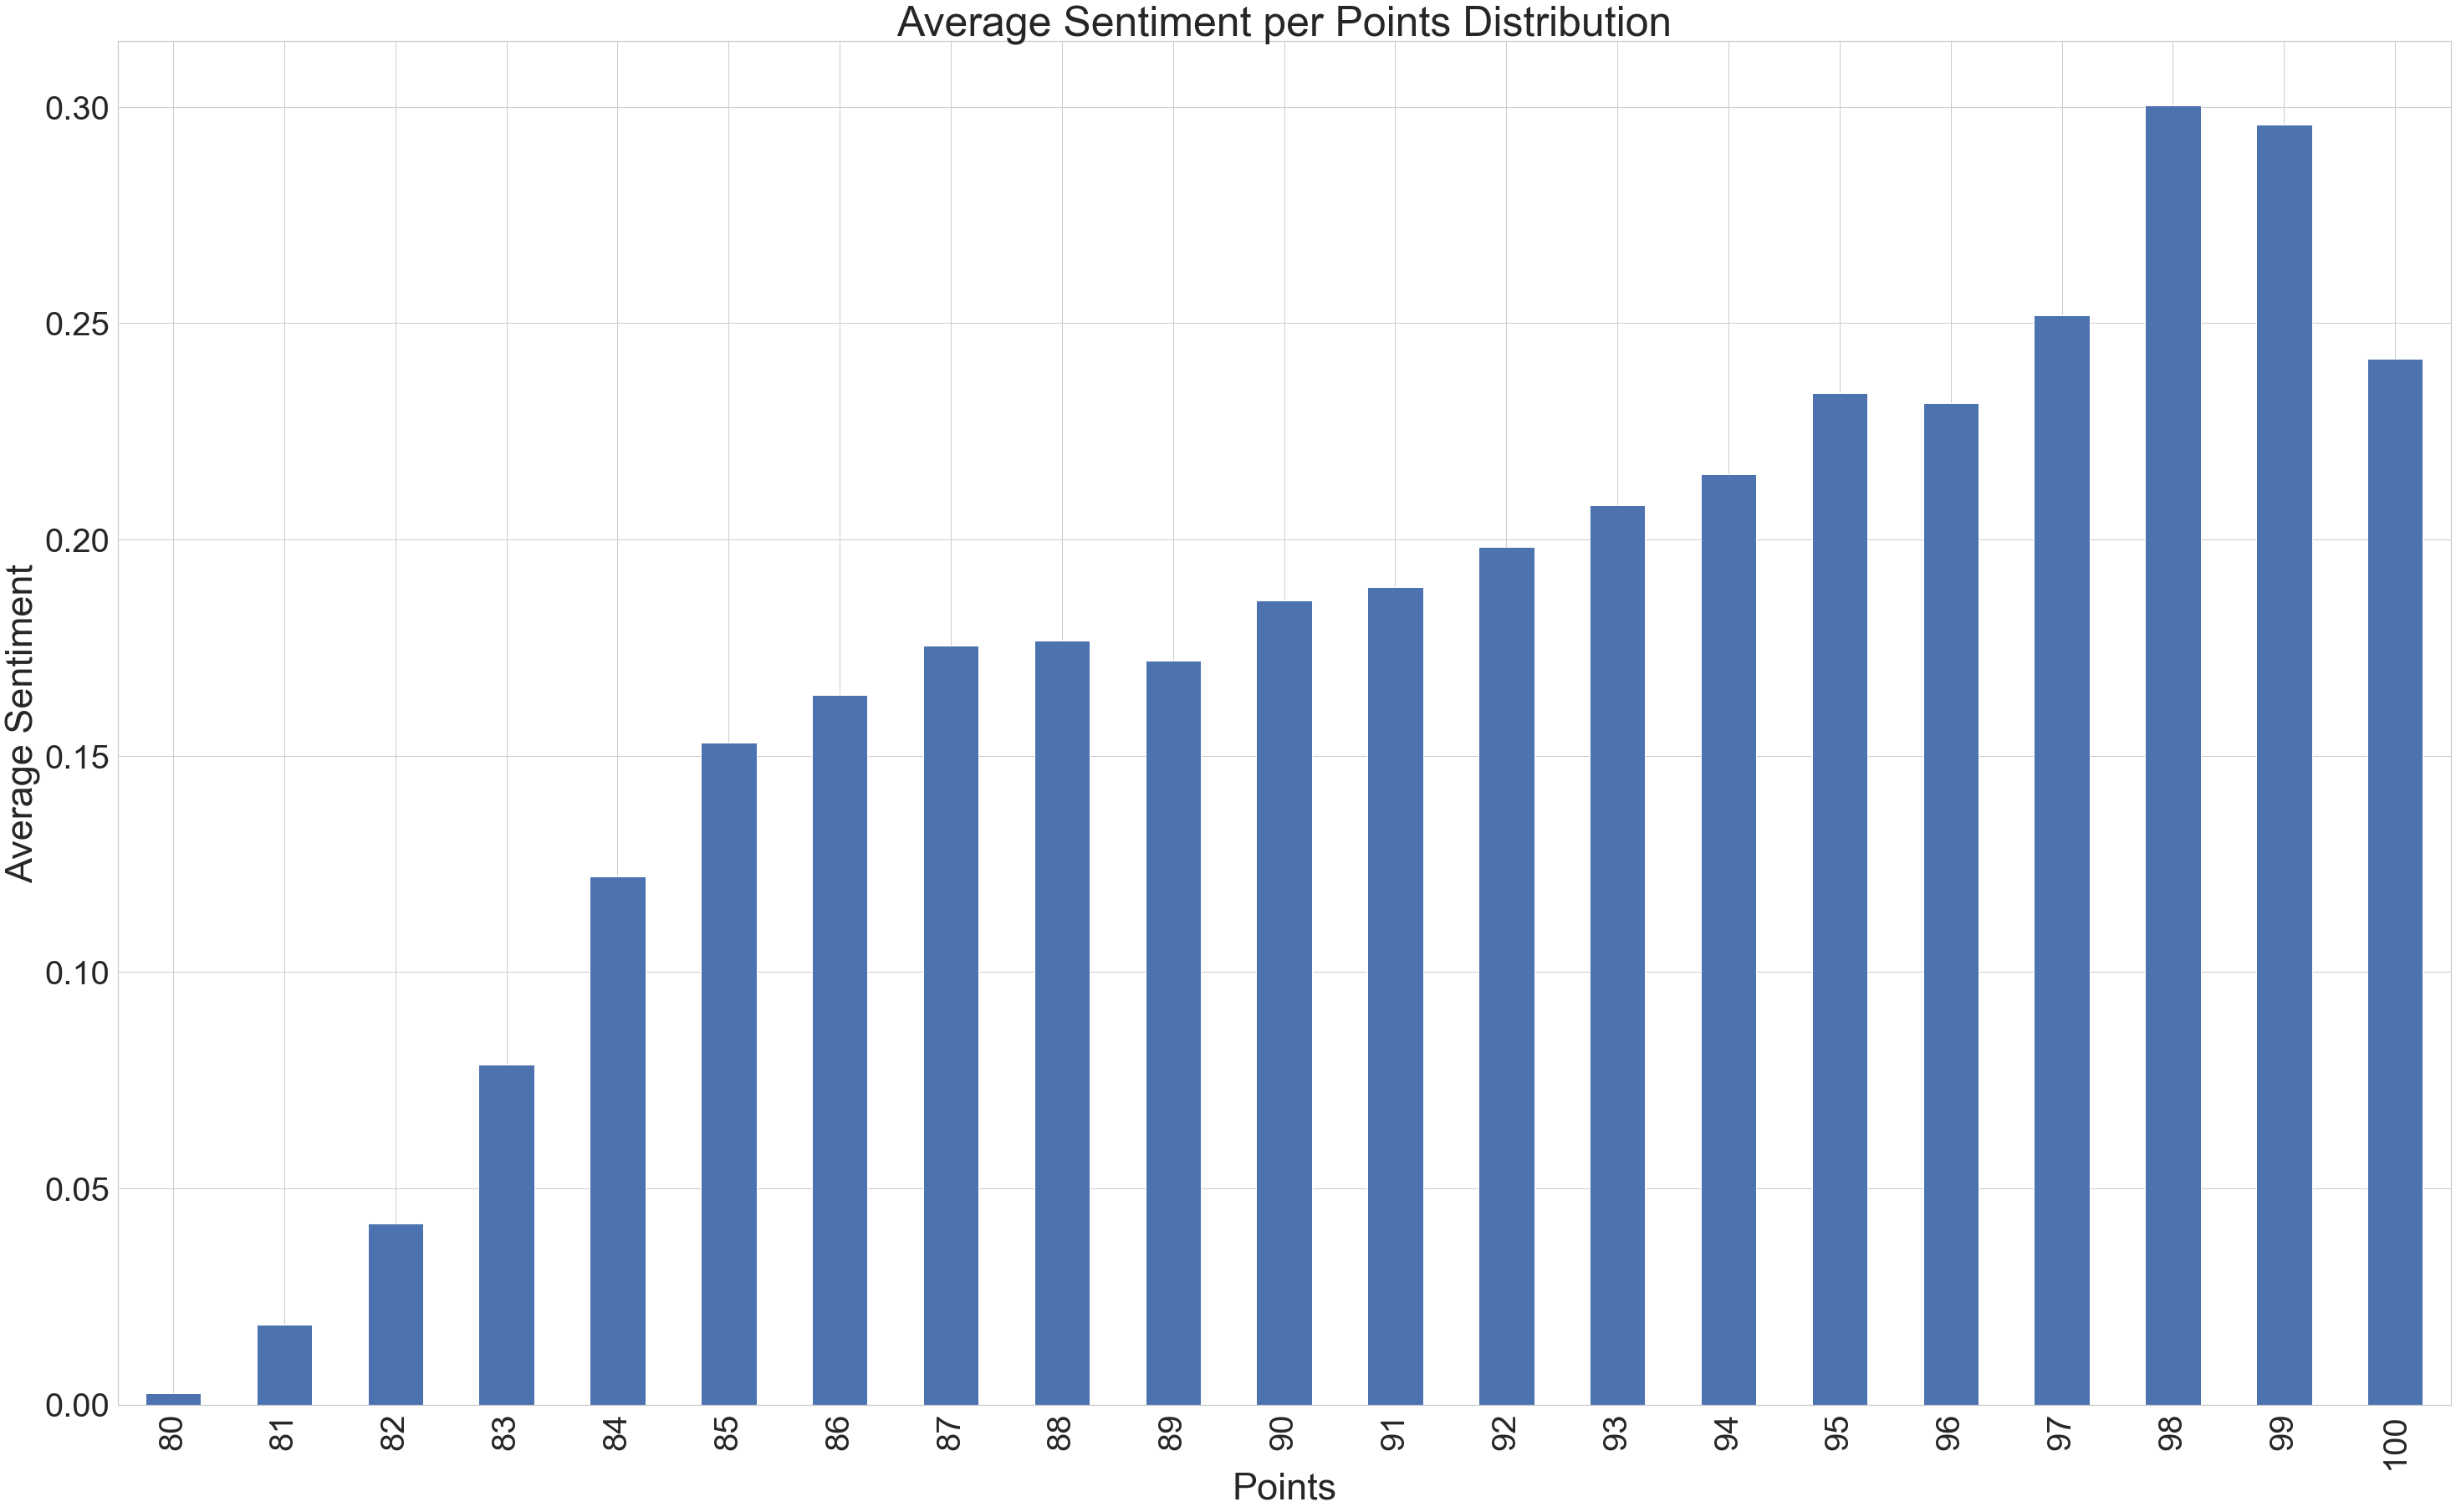

In [40]:
# Additionally, looking at how sentiment is distributed over the points and the rating system I created
# It is clear that the average positive sentiment per-point/rating class is higher for the highly rated wines.

polarity_avg = data.groupby('points')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Points', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Points Distribution', fontsize=50)
plt.show()

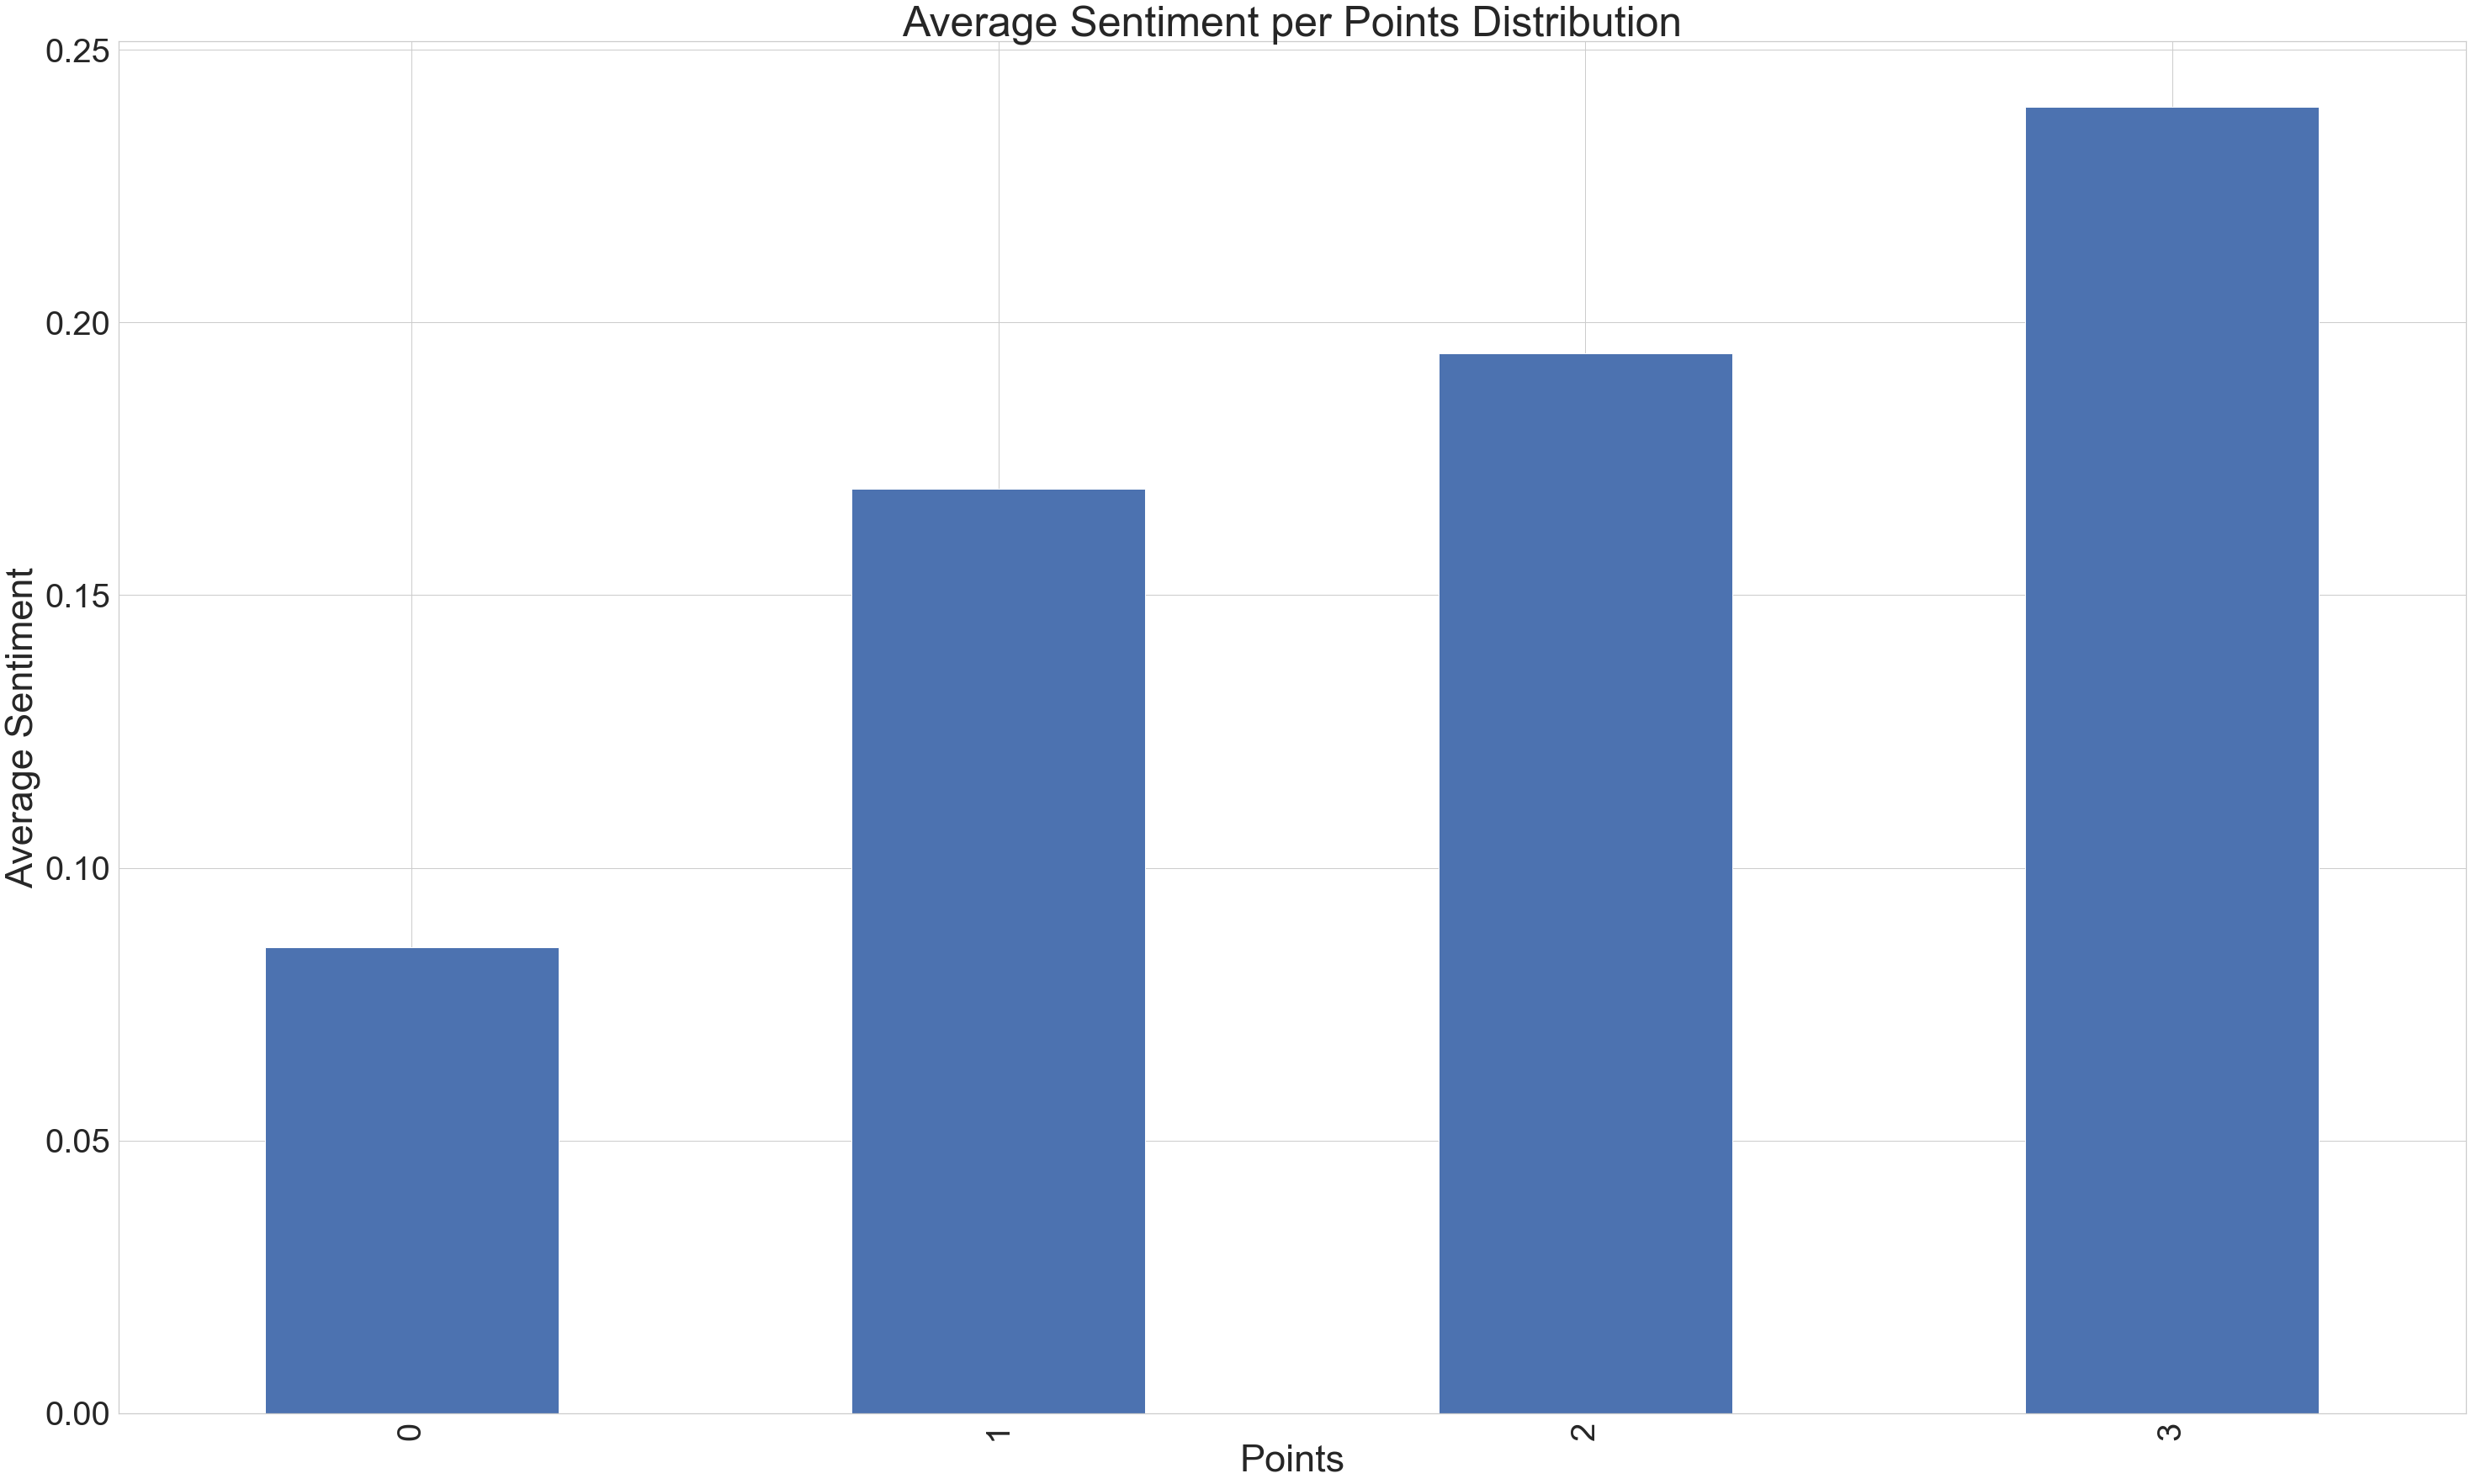

In [41]:
polarity_rating = data.groupby('rating')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Points', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Points Distribution', fontsize=50)
plt.show()

#### Wine points by varietal sentiment.
The above information was interesting, however not very helpful. In the wine industry, points are allocated based on the typology the wine varietal exemplifies. Thus to make the sentiment usable, 

In [ ]:
import pandas as pd
import requests
import time
import numpy as np
import nltk
import pyLDAvis
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
pyLDAvis.enable_notebook()

In [ ]:
df.shape

In [ ]:
df['country'] =df['country'].astype('category')
df['province'] =df['province'].astype('category')
df['variety'] =df['variety'].astype('category')
df['winery'] =df['winery'].astype('category')



df.dtypes

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['country_cat'] = le.fit_transform(df['country'])

dummy_varieties = pd.get_dummies(df['variety'])

df = pd.concat([df, dummy_varieties], axis=1)
df.describe()

In [ ]:
#Looking at the specific stats between countries.
#This will also be used to eliminate outlier countries who's sum point counts are below the average.

#defining stats function with .describe() and .skew()
def stats(x):
    results = pd.concat([x.describe(), x.skew()], axis=1)
    print(results)

stats(df[['country', 'points']].groupby('country'))

In [ ]:
from tqdm import tqdm

def corr_heatmap(df):
    corr = df.corr()
    fig = plt.figure(figsize=(25,20))
    ax = sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", linewidths=0.5, annot=True)
    ax.set_title("Correlation matrix")
    
    return ax

corr_heatmap(df)


In [ ]:
df_nums = df.drop(['province', 'variety', 'winery',
       'description', 'rating_description_str', 'tokenized', 'lemmatized',
       'lemma_str'], axis=1)
import ppscore as pps
 

def heatmap(df):
    fig = plt.figure(figsize=(70,50))
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="coolwarm", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

matrix = pps.matrix(df_nums)

matrix

#### Review of the Correlation and PPS tables
The Correlation and PPS tables above reveal some interesting findings about the data:

1) the relation between countries and points
2) 

### TF-IDF-NMF Model

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(df['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

In [ ]:
%%time

nmf = NMF(n_components=15, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

### LDA Model

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(new_df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

In [ ]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
             
display_topics(lda_model, tf_feature_names, no_top_words)


In [ ]:
pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer)

### Comparing topics generated between LDA and NMF models:

Looking over the two sets if topics, it appears the NMF model generates much better overall topic descriptions than the LDA model based a sommelier book called Wine Folly which offer descriptions on wines and how to translate the different descriptions. (will be creating a vectorization model from this later)

In [ ]:


nmf_topic_values = nmf.transform(tfidf)
df['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
df['lda_topics'] = lda_topic_values.argmax(axis=1)
lda_remap = {0: 'flavor apple citrus acidity wine crisp peach white finish fruit',
             1: 'fruit seem noir pinot new go acid perfume bit acidic',
             2: 'cherry black tannin cabernet blend blackberry finish dry merlot drink',
             3: 'wine import vineyard year vintage one grape time intense pie',
             4: 'cherry flavor raspberry dry little cola spice simple pinot red',
             5: 'flavor finish palate fruit berry plum aroma big feel herbal',
             6: 'wine fruit spice aroma aromas berry mouth note bright offer',
             7: 'flavor wine oak sweet rich good blackberry best like show',
             8: 'finish flavor style palate nose sweet light candy hint note',
             9: 'wine fruit acidity ripe age tannin year flavor rich structure'}
df['lda_topics'] = df['lda_topics'].map(lda_remap)
nmf_remap = {0: 'finish berry palate nose plum aroma herbal note flavor feel',
             1: 'oak vanilla toast pineapple chardonnay butter rich flavor creamy acidity',
             2: 'wine fruit age year ripe structure wood rich well tannin',
             3: 'pinot cherry noir raspberry cola silky flavor red drink spice', 
             4: 'acidity fresh light fruity wine bright red drink crisp attractive',
             5: 'sweet soft simple taste like flavor candy wine little jammy',
             6: 'cabernet blend sauvignon merlot franc syrah verdot petit blanc sangiovese',
             7: 'apple citrus white peach green crisp pear lemon clean lime',
             8: 'black cherry spice tannin dark pepper chocolate offer blackberry licorice',
             9: 'dry blackberry good currant flavor tannic show drink tannin wine'}
df['nmf_topics'] = df['nmf_topics'].map(nmf_remap)

In [ ]:
df.head()

### Checkpoint

In [ ]:
df.sort_values(by=['points'])

In [ ]:
nmf_x = df['nmf_topics'].value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(nmf_x, nmf_y.index)
plt.title("NMF Topic Distribution", fontsize=50)
plt.ylabel('Review Topics', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

In [ ]:
df_low_points = df.loc[(df['points']==80) | (df['points']==87)]
nmf_low_x = df_low_points['nmf_topics'].value_counts()
nmf_low_y = nmf_low_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(nmf_low_x, nmf_low_y.index)
plt.title("NMF Topic Distribution for Low Points (1 & 2)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Review Topics', fontsize=50)
plt.xticks(fontsize=40)

In [ ]:
df_high_ratings = df.loc[(df['points']==88) | (df['points']==100)]
nmf_high_x = df_high_ratings['nmf_topics'].value_counts()
nmf_high_y = nmf_high_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(nmf_high_x, nmf_high_y.index)
plt.title("NMF Topic Distribution for High Points (3 & 4)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Review Topics', fontsize=50)
plt.xticks(fontsize=40)

In [ ]:
wines.head()

In [ ]:
wines_new= wines.drop(['lemmatized', 'points'], axis=1)

In [ ]:
new_df = pd.concat([df, wines_new], axis=1)

In [ ]:
new_df.head()

In [ ]:
x_rating = new_df.points.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Point Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Wine Points', fontsize=50)
plt.xticks(fontsize=40)

In [ ]:
new_df['word_count'] = new_df['lemmatized'].apply(lambda x: len(str(x).split()))
new_df['review_len'] = new_df['lemma_str'].astype(str).apply(len)

new_df.head()

In [ ]:
letter_avg = new_df.groupby('points')['review_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Points', fontsize=35)
plt.ylabel('Count of Letters in Points', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Points Distribution', fontsize=40)
plt.show()

In [ ]:
word_avg = new_df.groupby('points')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Points', fontsize=35)
plt.ylabel('Count of Words in Points', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Points Distribution', fontsize=40)
plt.show()

In [ ]:
correlation = new_df[['points','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

In [ ]:
word = new_df['lemmatized']

words_nmf = new_df['nmf_topics']

words_lda = new_df['lda_topics']

In [ ]:
mostcommon = FreqDist(word).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
mostcommon = FreqDist(words_nmf).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
mostcommon = FreqDist(words_lda).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
new_df = new_df.drop(['province', 'variety'], axis=1)
new_df.to_csv('winesft_w_models.csv', index=False, encoding='utf-8')

In [ ]:
new_df.loc[new_df['points'] == 100]

### model 2

In [ ]:
plt.figure(figsize=(200,50))
plt.xticks(fontsize=40)
ax = sns.boxplot(x="country", y="points", data=new_df)

In [ ]:
new_df

In [ ]:
new_df.to_csv('new_clean_df.csv', index=False, encoding='utf-8')

In [ ]:
perfect_sen = new_df.loc[new_df['sentiment'] == 1]
plt.figure(figsize=(100,50))
plt.xticks(fontsize=40)
ax = sns.boxplot(x="country", y="points", data=perfect_sen)